In [1]:
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [9]:
retina = RNA_counts.from_file('inputs/GSM1626793_P14Retina_1.processed.tsv')

In [6]:
retina_tSNE = DR.from_file(datafile='dev/pymethods_out/retina_clu_tSNE.csv', labels=[None,None], name='t-SNE', barcodefile='inputs/retina_clu.csv')

In [13]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Slc17a6$')].flatten(), save_to='images/retina_clu_Slc17a6.png', figsize=(6,6))

In [75]:
retina_tSNE.plot_barcodes(save_to='images/retina_clu_barcodes.png', figsize=(7,7))

---

In [24]:
colon = RNA_counts.from_file('inputs/GSM2743164_rep1_colon_rnaseq_filtered.tsv.gz')

In [33]:
colon2 = RNA_counts.from_file('inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv')

In [73]:
colon_tSNE = DR.from_file(datafile='dev/pymethods_out/colon_clu_tSNE.csv', labels=[None,None], name='t-SNE', barcodefile='inputs/colon_clu.csv')

In [74]:
colon_tSNE.plot_barcodes(save_to='images/colon_clu_barcodes.png', figsize=(7,7))

In [45]:
colon_tSNE.plot(color=colon2.arcsinh_norm()[:,colon2.gene_IDs=='Clca1'].flatten(), save_to='images/colon_clu_Clca1.png', figsize=(6,6))

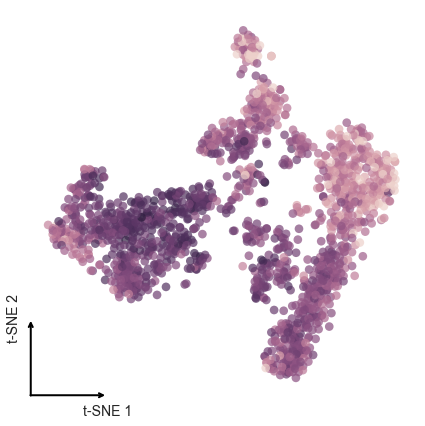

In [47]:
colon_tSNE.plot(color=colon2.arcsinh_norm()[:,colon2.gene_IDs=='Krt8'].flatten(), figsize=(6,6))

In [51]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Cd8a'].flatten(), save_to='images/colon_clu_Cd8a.png', figsize=(6,6))

---

In [57]:
colon_tSNE = DR.from_file(datafile='dev/pymethods_out/colon_clu_tSNE.csv', labels=[None,None], barcodefile='inputs/colon_clu.csv')

In [66]:
colon_tSNE.plot(figsize=(3,3), save_to='quick.png')

In [70]:
%%time 
k=30
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon2.distance_matrix(transform='arcsinh'), post=colon_tSNE.distance_matrix())
knn = knn_preservation(pre=colon2.knn_graph(k, transform='arcsinh'), post=colon_tSNE.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

R: 0.7528
EMD: 0.115
KLD: 0.0838
Knn Pres.: 97.7681
CPU times: user 1min 6s, sys: 12 s, total: 1min 19s
Wall time: 1min 19s


CPU times: user 11.6 s, sys: 254 ms, total: 11.8 s
Wall time: 11.4 s


<Figure size 216x216 with 0 Axes>

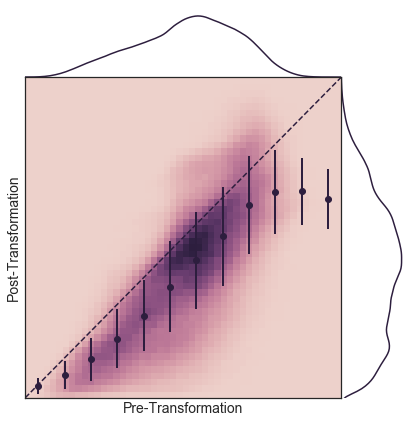

In [71]:
%%time
# output plots to file
#plt.figure(figsize=(3,3))
#plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='quick_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(3,3))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='quick_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
DR methods with ground-truth clusters

In [76]:
retina_PCA2 = fcc_PCA(retina.arcsinh_norm(), barcodes=retina_tSNE.barcodes, n_components=2)

In [78]:
retina_PCA2.plot_barcodes(figsize=(6,6), save_to='images/retina_PCA2_barcodes.png')

In [84]:
retina_DCA = DR.from_file('dev/pymethods_out/retina_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='inputs/retina_clu.csv')
retina_DCA.plot_barcodes(figsize=(6,6), save_to='images/retina_DCA_barcodes.png')

In [86]:
retina_scVI = DR.from_file('dev/pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='inputs/retina_clu.csv')
retina_scVI.plot_barcodes(figsize=(6,6), save_to='images/retina_scVI_barcodes.png')

In [88]:
retina_tSNE = DR.from_file('dev/pymethods_out/retina_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='inputs/retina_clu.csv')
retina_tSNE.plot_barcodes(figsize=(6,6), save_to='images/retina_tSNE_barcodes.png')

In [89]:
retina_UMAP = DR.from_file('dev/pymethods_out/retina_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='inputs/retina_clu.csv')
retina_UMAP.plot_barcodes(figsize=(6,6), save_to='images/retina_UMAP_barcodes.png')

In [90]:
retina_ZIFA = DR.from_file('dev/pymethods_out/retina_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='inputs/retina_clu.csv')
retina_ZIFA.plot_barcodes(figsize=(6,6), save_to='images/retina_ZIFA_barcodes.png')

In [108]:
retina_scvis = DR.from_file('dev/scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', barcodefile='inputs/retina_clu.csv')
retina_scvis.plot_barcodes(figsize=(6,6), save_to='images/retina_scvis_barcodes.png')

In [100]:
retina_ZINBWAVE = DR.from_file('dev/Rmethods_out/retina_ZINB-WAVE.csv.gz', labels=[None,0], name='ZINB-WaVE', barcodefile='inputs/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(figsize=(6,6), save_to='images/retina_ZINBWAVE_barcodes.png')

In [102]:
retina_SIMLR = DR.from_file('dev/Rmethods_out/retina_SIMLR_ydata.csv.gz', labels=[None,0], name='SIMLR', barcodefile='inputs/retina_clu.csv')
retina_SIMLR.plot_barcodes(figsize=(6,6), save_to='images/retina_SIMLR_barcodes.png')

In [103]:
retina_GLMPCA = DR.from_file('dev/Rmethods_out/retina_GLM-PCA.csv.gz', labels=[None,0], name='GLM-PC', barcodefile='inputs/retina_clu.csv')
retina_GLMPCA.plot_barcodes(figsize=(6,6), save_to='images/retina_GLMPCA_barcodes.png')

---

In [79]:
colon_PCA2 = fcc_PCA(colon2.arcsinh_norm(), barcodes=colon_tSNE.barcodes, n_components=2)

In [81]:
colon_PCA2.plot_barcodes(figsize=(6,6), save_to='images/colon_PCA2_barcodes.png')

In [109]:
colon_DCA = DR.from_file('dev/pymethods_out/colon_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='inputs/colon_clu.csv')
colon_DCA.plot_barcodes(figsize=(6,6), save_to='images/colon_DCA_barcodes.png')

In [110]:
colon_scVI = DR.from_file('dev/pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='inputs/colon_clu.csv')
colon_scVI.plot_barcodes(figsize=(6,6), save_to='images/colon_scVI_barcodes.png')

In [111]:
colon_tSNE = DR.from_file('dev/pymethods_out/colon_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='inputs/colon_clu.csv')
colon_tSNE.plot_barcodes(figsize=(6,6), save_to='images/colon_tSNE_barcodes.png')

In [112]:
colon_UMAP = DR.from_file('dev/pymethods_out/colon_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='inputs/colon_clu.csv')
colon_UMAP.plot_barcodes(figsize=(6,6), save_to='images/colon_UMAP_barcodes.png')

In [113]:
colon_ZIFA = DR.from_file('dev/pymethods_out/colon_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='inputs/colon_clu.csv')
colon_ZIFA.plot_barcodes(figsize=(6,6), save_to='images/colon_ZIFA_barcodes.png')

In [114]:
colon_scvis = DR.from_file('dev/scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', barcodefile='inputs/colon_clu.csv')
colon_scvis.plot_barcodes(figsize=(6,6), save_to='images/colon_scvis_barcodes.png')

In [115]:
colon_ZINBWAVE = DR.from_file('dev/Rmethods_out/colon_ZINB-WAVE.csv.gz', labels=[None,0], name='ZINB-WaVE', barcodefile='inputs/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(figsize=(6,6), save_to='images/colon_ZINBWAVE_barcodes.png')

In [116]:
colon_SIMLR = DR.from_file('dev/Rmethods_out/colon_SIMLR_ydata.csv.gz', labels=[None,0], name='SIMLR', barcodefile='inputs/colon_clu.csv')
colon_SIMLR.plot_barcodes(figsize=(6,6), save_to='images/colon_SIMLR_barcodes.png')

In [117]:
colon_GLMPCA = DR.from_file('dev/Rmethods_out/colon_GLM-PCA.csv.gz', labels=[None,0], name='GLM-PC', barcodefile='inputs/colon_clu.csv')
colon_GLMPCA.plot_barcodes(figsize=(6,6), save_to='images/colon_GLMPCA_barcodes.png')